<a href="https://colab.research.google.com/github/LucasLucena001/RegressaoLinearConsumoCO2/blob/main/Regress%C3%A3oLinearConsumoCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
consumo = pd.read_csv('/content/ConsumoCo2.csv')

In [3]:
consumo.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
le.fit(consumo.MODELYEAR)
consumo.MODELYEAR = le.transform(consumo.MODELYEAR)

le.fit(consumo.MAKE)
consumo.MAKE = le.transform(consumo.MAKE)

le.fit(consumo.MODEL)
consumo.MODEL = le.transform(consumo.MODEL)

le.fit(consumo.VEHICLECLASS)
consumo.VEHICLECLASS = le.transform(consumo.VEHICLECLASS)

le.fit(consumo.TRANSMISSION)
consumo.TRANSMISSION = le.transform(consumo.TRANSMISSION)

le.fit(consumo.FUELTYPE)
consumo.FUELTYPE = le.transform(consumo.FUELTYPE)

In [6]:
consumo.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244


<Axes: xlabel='CO2EMISSIONS', ylabel='Count'>

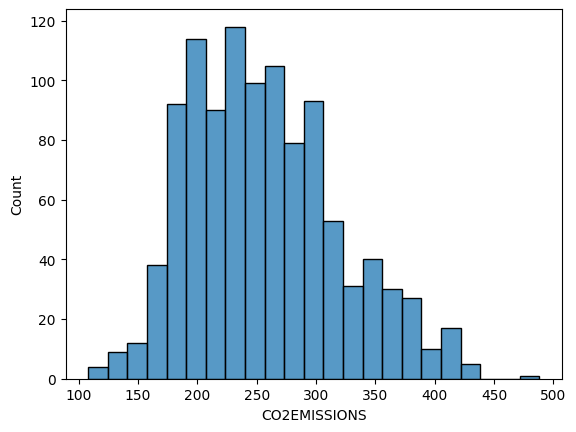

In [7]:
sns.histplot(consumo, x = 'CO2EMISSIONS')

In [8]:
consumo.describe()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,0.0,17.223055,331.014995,6.337395,3.346298,5.794752,9.670103,2.269916,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,10.937264,188.664368,5.095388,1.415895,1.797447,6.673143,0.722374,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.0,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,0.0,7.000000,173.000000,2.000000,2.000000,4.000000,2.000000,2.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,0.0,15.000000,324.000000,6.000000,3.400000,6.000000,11.000000,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,0.0,26.000000,502.500000,11.000000,4.300000,8.000000,13.000000,3.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,0.0,38.000000,662.000000,15.000000,8.400000,12.000000,21.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

consumo_norm = pd.DataFrame(scaler.fit_transform(consumo), index = consumo.index, columns = consumo.columns)

In [10]:
consumo_norm.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.0,0.0,0.496979,0.000000,0.135135,0.111111,0.476190,1.0,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.0,0.0,0.496979,0.000000,0.189189,0.111111,0.952381,1.0,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.0,0.0,0.498489,0.000000,0.067568,0.111111,0.809524,1.0,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.0,0.0,0.587613,0.733333,0.337838,0.333333,0.523810,1.0,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.0,0.0,0.729607,0.733333,0.337838,0.333333,0.523810,1.0,0.292969,0.243590,0.279621,0.326531,0.357895


In [11]:
import statsmodels.formula.api as smf

In [12]:
function = 'CO2EMISSIONS~MODELYEAR+MAKE+MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+TRANSMISSION+FUELTYPE+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     881.2
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:07:45   Log-Likelihood:                 1636.0
No. Observations:                1067   AIC:                            -3248.
Df Residuals:                    1055   BIC:                            -3188.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [13]:
function = 'CO2EMISSIONS~MAKE+MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+TRANSMISSION+FUELTYPE+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     881.2
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:08:34   Log-Likelihood:                 1636.0
No. Observations:                1067   AIC:                            -3248.
Df Residuals:                    1055   BIC:                            -3188.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [14]:
function = 'CO2EMISSIONS~MAKE+MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+FUELTYPE+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     970.3
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:09:01   Log-Likelihood:                 1636.0
No. Observations:                1067   AIC:                            -3250.
Df Residuals:                    1056   BIC:                            -3195.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [15]:
function = 'CO2EMISSIONS~MAKE+MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+FUELTYPE+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:09:23   Log-Likelihood:                 1635.6
No. Observations:                1067   AIC:                            -3251.
Df Residuals:                    1057   BIC:                            -3201.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [16]:
function = 'CO2EMISSIONS~MAKE+MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+FUELTYPE+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1214.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:09:38   Log-Likelihood:                 1635.6
No. Observations:                1067   AIC:                            -3253.
Df Residuals:                    1058   BIC:                            -3208.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [17]:
function = 'CO2EMISSIONS~MODEL+VEHICLECLASS+ENGINESIZE+CYLINDERS+FUELTYPE+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1386.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:10:05   Log-Likelihood:                 1634.6
No. Observations:                1067   AIC:                            -3253.
Df Residuals:                    1059   BIC:                            -3213.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
function = 'CO2EMISSIONS~+VEHICLECLASS+ENGINESIZE+CYLINDERS+FUELTYPE+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'
model = smf.ols(formula = function, data=consumo_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1616.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        15:10:16   Log-Likelihood:                 1633.7
No. Observations:                1067   AIC:                            -3253.
Df Residuals:                    1060   BIC:                            -3219.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
x = consumo_norm[["VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "FUELTYPE", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
y = consumo_norm[["CO2EMISSIONS"]]

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y , test_size = 0.20, random_state = 42)

lr = LinearRegression()

lr.fit(x,y)

LinearRegression()

In [23]:
r_sqr = lr.score(x,y)
r_sqr

0.9014277419321957

In [24]:
y_pred_treino = lr.predict(x_treino)
print("MAE", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE", metrics.mean_squared_error(y_treino, y_pred_treino))
print("MAE", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE 0.037266395067627994
MSE 0.002847225389892645
MAE 0.05335939832768587


In [25]:
y_pred_teste = lr.predict(x_teste)
print("MAE", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE", metrics.mean_squared_error(y_teste, y_pred_teste))
print("MAE", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE 0.033050189821956885
MSE 0.002307215165313869
MAE 0.04803347962946125
